<a href="https://colab.research.google.com/github/jwarmuz99/Eluvio-DS-Challenge/blob/main/Eluvio_DS_NNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import io
import numpy as np

from keras.models import Sequential, Model
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Activation, Input, LSTM, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [3]:
uploaded = files.upload()

Saving all_df.csv to all_df.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['all_df.csv']))
df.head()

,Unnamed: 0,up_votes,title,over_18,author,posted_before,proliferate,viral,timestamp,month,day_of_week,is_holiday,title_cleaned,lda_topic,sentiment_distil,sentiment_imdb,is_weekend
0,0,3,Scores killed in Pakistan clashes,False,polar,0,False,False,2008-01-25 03:34:06,1,4,False,scores killed in pakistan clashes,0,-1.0,-1.0,False
1,1,2,Japan resumes refuelling mission,False,polar,1,False,False,2008-01-25 03:34:35,1,4,False,japan resumes refuelling mission,1,0.5,-0.5,False
2,2,3,US presses Egypt on Gaza border,False,polar,2,False,False,2008-01-25 03:42:03,1,4,False,us presses egypt on gaza border,1,-1.0,-1.0,False
3,3,1,Jump-start economy: Give health care to all,False,fadi420,0,False,False,2008-01-25 03:54:50,1,4,False,jump-start economy give health care to all,0,1.0,1.0,False
4,4,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans,0,False,False,2008-01-25 15:25:20,1,4,False,council of europe bashes eu&un terror blacklist,0,-0.5,0.5,False


In [5]:
df['over_18'] = df['over_18'].apply(lambda x: 1 if x == True else 0)

df['proliferate'] = df['proliferate'].apply(lambda x: 1 if x == True else 0)

df['viral'] = df['viral'].apply(lambda x: 1 if x == True else 0)

df['is_holiday'] = df['is_holiday'].apply(lambda x: 1 if x == True else 0)

df['is_weekend'] = df['is_weekend'].apply(lambda x: 1 if x == True else 0)

# One-Hot-Encoding
df = pd.get_dummies(df, columns=['lda_topic'])

In [8]:
y_reg = df['up_votes']
y_class = df['viral']

X = df.drop(columns=['title', 'author', 'viral', 'timestamp', 'title_cleaned', 'up_votes'])

colnames = X.columns

# I am using the MinMaxScaler as it preserves the properties of the distributions better than other scalers
X = MinMaxScaler().fit_transform(X)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=123)
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_train_reg, y_train_reg, test_size=0.2, random_state=123)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=123)
X_train_class, X_val_class, y_train_class, y_val_class = train_test_split(X_train_class, y_train_class, test_size=0.2, random_state=123)

print("Mean of up_votes on the train set:", "{0:.3f}".format(y_train_reg.mean()))
print("Mean of up_votes on the validation set:", "{0:.3f}".format(y_val_reg.mean()))
print("Mean of up_votes on the test set:", "{0:.3f}".format(y_test_reg.mean()))
print()
print("% of viral videos in the train set:", "{0:.3f}".format(y_train_class.mean()))
print("% of viral videos in the validation set:", "{0:.3f}".format(y_val_class.mean()))
print("% of viral videos in the test set:", "{0:.3f}".format(y_test_class.mean()))

Mean of up_votes on the train set: 18.631
Mean of up_votes on the validation set: 18.573
Mean of up_votes on the test set: 18.641

% of viral videos in the train set: 0.099
% of viral videos in the validation set: 0.098
% of viral videos in the test set: 0.099


### Regression

In [14]:
dim = X_train_reg.shape[1]

model_reg = Sequential()
model_reg.add(Dense(128, input_dim=dim, kernel_initializer='normal', activation="relu"))
model_reg.add(Dropout(0.6))
model_reg.add(Dense(64, kernel_initializer='normal', activation="relu"))
model_reg.add(Dropout(0.4))
model_reg.add(Dense(32, kernel_initializer='normal', activation="linear"))
model_reg.add(Dropout(0.2))
model_reg.add(Dense(1, activation="linear"))


model_reg.compile(loss="mean_squared_error", optimizer=Adam())
# train the model
model_reg.fit(x=X_train_reg, y=y_train_reg, validation_data=(X_val_reg, y_val_reg),epochs=20, batch_size=64)

Epoch 1/20
5093/5093 [==============================] - 10s 2ms/step - loss: 977.7763 - val_loss: 957.5200
Epoch 2/20
5093/5093 [==============================] - 10s 2ms/step - loss: 966.2151 - val_loss: 955.9472
Epoch 3/20
5093/5093 [==============================] - 10s 2ms/step - loss: 962.2126 - val_loss: 957.1174
Epoch 4/20
5093/5093 [==============================] - 10s 2ms/step - loss: 963.9822 - val_loss: 956.1973
Epoch 5/20
5093/5093 [==============================] - 10s 2ms/step - loss: 960.6034 - val_loss: 954.4285
Epoch 6/20
5093/5093 [==============================] - 10s 2ms/step - loss: 961.5567 - val_loss: 954.7739
Epoch 7/20
5093/5093 [==============================] - 10s 2ms/step - loss: 960.1463 - val_loss: 954.1240
Epoch 8/20
5093/5093 [==============================] - 10s 2ms/step - loss: 961.3484 - val_loss: 954.3388
Epoch 9/20
5093/5093 [==============================] - 10s 2ms/step - loss: 957.4302 - val_loss: 954.0864
Epoch 10/20
5093/5093 [==============

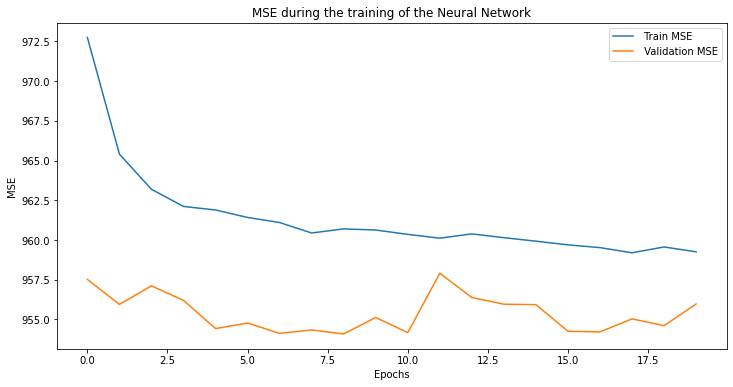

In [23]:
# visualize training
plt.figure(figsize=(12,6))
plt.plot(model_reg.history.history['loss'], label=' Train MSE')
plt.plot(model_reg.history.history['val_loss'],label=' Validation MSE')

plt.xlabel("Epochs")
plt.ylabel("MSE")

plt.title("MSE during the training of the Neural Network")
plt.legend()
plt.show()

In [26]:
# predict on test set
y_pred = model_reg.predict(X_test_reg)
print("MSE on the test set:", metrics.mean_squared_error(y_test_reg, y_pred))
print("Variance on the independent variable explained by the model:", metrics.r2_score(y_test_reg, y_pred))

MSE on the test set: 958.5999225204184
Variance on the independent variable explained by the model: 0.014366595821785344


### Classification

In [34]:
dim = X_train_class.shape[1]

model_class = Sequential()
model_class.add(Dense(128, input_dim=dim, kernel_initializer='normal', activation="relu"))
model_class.add(Dropout(0.6))
model_class.add(Dense(64, kernel_initializer='normal', activation="relu"))
model_class.add(Dropout(0.4))
model_class.add(Dense(32, kernel_initializer='normal', activation="linear"))
model_class.add(Dropout(0.2))
model_class.add(Dense(1, activation="sigmoid"))


model_class.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=['AUC'])
# train the model
model_class.fit(x=X_train_class, y=y_train_class, validation_data=(X_val_class, y_val_class),epochs=20, batch_size=64)

Epoch 1/20
5093/5093 [==============================] - 14s 3ms/step - loss: 0.3339 - auc: 0.5318 - val_loss: 0.3180 - val_auc: 0.5828
Epoch 2/20
5093/5093 [==============================] - 12s 2ms/step - loss: 0.3214 - auc: 0.5534 - val_loss: 0.3177 - val_auc: 0.5817
Epoch 3/20
5093/5093 [==============================] - 13s 2ms/step - loss: 0.3184 - auc: 0.5542 - val_loss: 0.3170 - val_auc: 0.5836
Epoch 4/20
5093/5093 [==============================] - 13s 3ms/step - loss: 0.3190 - auc: 0.5621 - val_loss: 0.3166 - val_auc: 0.5832
Epoch 5/20
5093/5093 [==============================] - 13s 2ms/step - loss: 0.3185 - auc: 0.5655 - val_loss: 0.3165 - val_auc: 0.5867
Epoch 6/20
5093/5093 [==============================] - 12s 2ms/step - loss: 0.3191 - auc: 0.5678 - val_loss: 0.3172 - val_auc: 0.5845
Epoch 7/20
5093/5093 [==============================] - 12s 2ms/step - loss: 0.3168 - auc: 0.5690 - val_loss: 0.3168 - val_auc: 0.5858
Epoch 8/20
5093/5093 [==============================] -

In [36]:
y_pred = model_class.predict_proba(x=X_val_class)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


ROC AUC: 0.5907232257718302


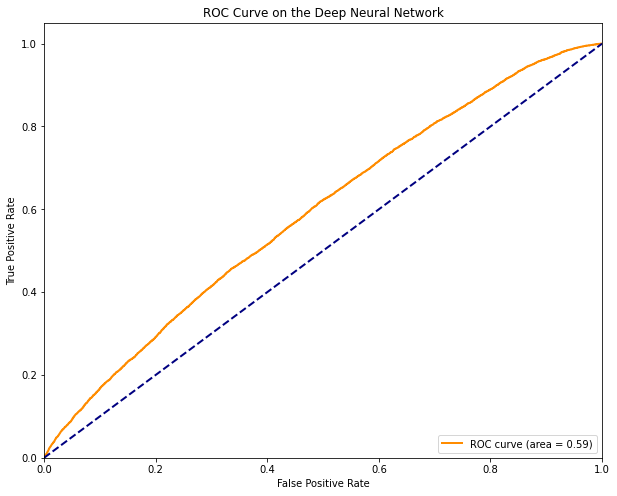

In [40]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_val_class, y_pred)

roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
print('ROC AUC:', roc_auc)

lw = 2
plt.figure(figsize=[10,8])
plt.plot(false_positive_rate, true_positive_rate, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on the Deep Neural Network')
plt.legend(loc="lower right")
plt.show()

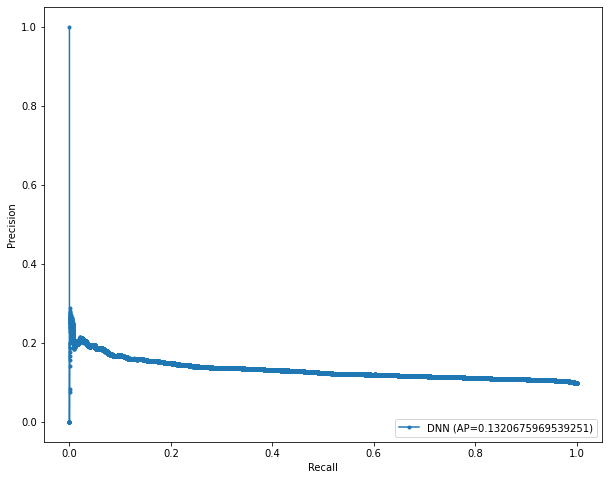

In [60]:
plt.figure(figsize=[10,8])
# calculate model precision-recall curve
ap = metrics.average_precision_score(y_val_class, y_pred)
precision, recall, _ = metrics.precision_recall_curve(y_val_class, y_pred)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label=f'DNN (AP={ap})')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

Text(0, 0.5, 'Frequency')

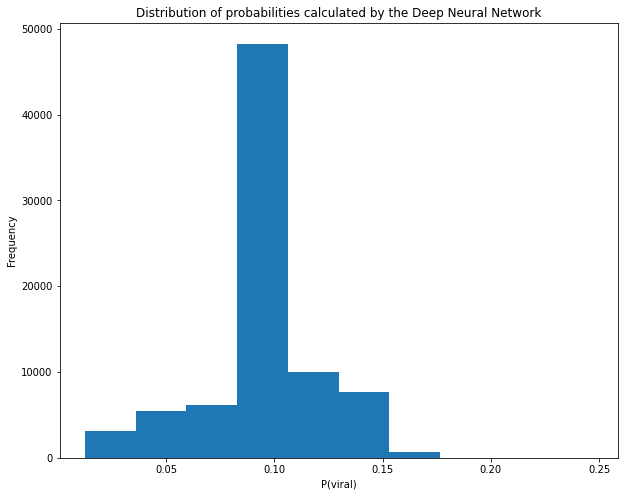

In [61]:
# Displayng the distribution of probabilities calculated by the model
plt.figure(figsize=[10,8])
plt.hist(y_pred)
plt.title("Distribution of probabilities calculated by the Deep Neural Network")
plt.xlabel("P(viral)")
plt.ylabel("Frequency")

In [54]:
def metrics_transformation(probabilities, threshold):
    preds = []
    for prob in probabilities:
        if prob > threshold:
            preds.append(1)
        else:
            preds.append(0)
    return preds

thresholds = np.linspace(0.05, 0.20, 10)

def find_max_F1_threshold(predicted_probabilities, true_y):
    thresholds = [i/100 for i in range(100)]
    max_F1 = -1
    best_threshold = -1
    for threshold in thresholds:
        preds = metrics_transformation(predicted_probabilities, threshold)
        F1 = metrics.f1_score(true_y, preds)
        if F1>max_F1:
            best_threshold = threshold
            max_F1 = F1
    return best_threshold


def print_metrics(threshold, predicted_probabilities, true_y):
    preds = metrics_transformation(predicted_probabilities, threshold)
    cm = metrics.confusion_matrix(true_y, preds)
    precision = metrics.precision_score(true_y, preds)
    accuracy = metrics.accuracy_score(true_y, preds)
    f1 = metrics.f1_score(true_y, preds)
    print('For',threshold,'threshold, the obtained metrics are:')
    print("F1 Score =", f1)
    print("Precision =", precision)
    print("Accuracy =", accuracy)
    print()
    print("Confusion matrix:")
    print(cm)
    print()
    cm_norm = metrics.confusion_matrix(true_y, preds, normalize='true')
    print("Normalized confusion matrix:")
    print(cm_norm)


best_threshold = find_max_F1_threshold(y_pred, y_val_class)
print_metrics(best_threshold, y_pred, y_val_class)

For 0.1 threshold, the obtained metrics are:
F1 Score = 0.19949947780164345
Precision = 0.11841489660334986
Accuracy = 0.5014236971943347

Confusion matrix:
[[35793 37686]
 [ 2937  5062]]

Normalized confusion matrix:
[[0.48711877 0.51288123]
 [0.3671709  0.6328291 ]]


Deep Neural Network has performed better than previous, more traditional ML methods. This is both by the ROC AUC and F1 score which are significantly higher. The results are still far from perfect though. One flaw of the current model is that we only use the numerical and categorical data from the model. Even though some of the features have been created based on the NLP on the videos' titles, there still might be a lot of information within them that is not leveraged for the predictions. Because of that, we can try some methods to include the textual data in the form of video titles to improve the prediction of whether or not a video will go viral. To achieve this goal, we use word embeddings which represent the properties of the textual data. We create a Deep Neural Network that consists of 2 inputs: textual, and numerical. Both the inputs are passed through a couple of layers, after which they are concatenated and go through additional layers to obtain the final prediction. The hope is that including titles' word embeddings will significiantly improve the quality of the model.

In [14]:

y = df['viral']

X = df.drop(columns=['author', 'viral', 'timestamp', 'title_cleaned', 'up_votes'])

colnames = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [15]:
X_train_text = X_train['title']
X_train = X_train.drop(columns=['title'])
X_val_text = X_val['title']
X_val = X_val.drop(columns=['title'])
X_test_text = X_test['title']
X_test = X_test.drop(columns=['title'])

# I am using the MinMaxScaler as it preserves the properties of the distributions better than other scalers
X_train = MinMaxScaler().fit_transform(X_train)
X_val = MinMaxScaler().fit_transform(X_val)
X_test = MinMaxScaler().fit_transform(X_test)

print("% of viral videos in the train set:", "{0:.3f}".format(y_train.mean()))
print("% of viral videos in the validation set:", "{0:.3f}".format(y_val.mean()))
print("% of viral videos in the test set:", "{0:.3f}".format(y_test.mean()))


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train_class)

X_train_text = tokenizer.texts_to_sequences(X_train_text)
X_val_text = tokenizer.texts_to_sequences(X_val_text)
X_test_text = tokenizer.texts_to_sequences(X_test_text)
vocab_size = len(tokenizer.word_index) + 1 # Adding 1 because of reserved 0 index

% of viral videos in the train set: 0.099
% of viral videos in the validation set: 0.098
% of viral videos in the test set: 0.099


In [16]:
#the tokenizer we generated has different lengths therefore we need to pad 0 and make each vector of same length
maxlen = 100
X_train_text = pad_sequences(X_train_text, padding='post', maxlen=maxlen)
X_val_text = pad_sequences(X_val_text, padding='post', maxlen=maxlen)
X_test_text = pad_sequences(X_test_text, padding='post', maxlen=maxlen)

embedding_dim = 100

'model = Sequential()\nmodel.add(layers.Embedding(input_dim=vocab_size, \n                           output_dim=embedding_dim, \n                           input_length=maxlen))\nmodel.add(layers.GlobalMaxPool1D())\nmodel.add(layers.Dense(20, activation=\'relu\'))\nmodel.add(layers.Dense(1, activation=\'sigmoid\'))\nmodel.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=[\'AUC\'])\n\nmodel.fit(X_train, y_train_class,\n                    epochs=10,\n                    verbose=True,\n                    validation_data=(X_val, y_val_class),\n                    batch_size=64)'

In [66]:
dim = X_train.shape[1]

text_input = Input(shape=(maxlen,)) 
num_input = Input(shape=(dim,))

text_layer = layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen)(text_input) 
text_layer = layers.Conv1D(128, 5, activation='relu')(text_layer)
text_layer = layers.GlobalMaxPooling1D()(text_layer)
text_layer = layers.Dense(32, activation='relu')(text_layer)
text_layer = layers.Dropout(0.6)(text_layer)

num_layer = layers.Dense(128, activation='relu')(num_input)
num_layer = layers.Dropout(0.6)(num_layer)
num_layer = layers.Dense(64, activation='relu')(num_layer)

concat = layers.concatenate([text_layer, num_layer]) 

output = layers.Dense(32, activation='relu')(concat) 
output = layers.Dropout(0.5)(output)
output = layers.Dense(1, activation='sigmoid')(output) 

model_class = Model(inputs=[text_input , num_input], outputs=[output])
model_class.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.001), metrics=['AUC'])

model_class.fit(x = [X_train_text, X_train], 
          y = [y_train, y_train],
          epochs = 3,
          verbose = True,
          validation_data = ([X_val_text, X_val], [y_val, y_val]),
          batch_size = 256)

Epoch 1/3
1274/1274 [==============================] - 389s 304ms/step - loss: 0.3563 - auc: 0.5704 - val_loss: 0.2932 - val_auc: 0.7223
Epoch 2/3
1274/1274 [==============================] - 383s 301ms/step - loss: 0.2984 - auc: 0.7160 - val_loss: 0.2930 - val_auc: 0.7282
Epoch 3/3
1274/1274 [==============================] - 382s 300ms/step - loss: 0.2758 - auc: 0.7797 - val_loss: 0.2952 - val_auc: 0.7185


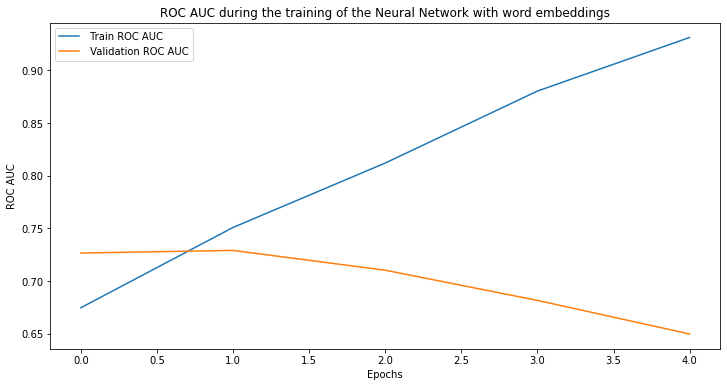

In [67]:
# visualize training
plt.figure(figsize=(12,6))
plt.plot(model.history.history['auc'], label=' Train ROC AUC')
plt.plot(model.history.history['val_auc'],label=' Validation ROC AUC')

plt.xlabel("Epochs")
plt.ylabel("ROC AUC")

plt.title("ROC AUC during the training of the Neural Network with word embeddings")
plt.legend()
plt.show()

The model was overfitting after the first epoch and thus the training was cut short to 3 epochs only.

In [68]:
y_pred = model.predict_on_batch(x = [X_test_text, X_test]).flatten()

ROC AUC: 0.6539365877528045


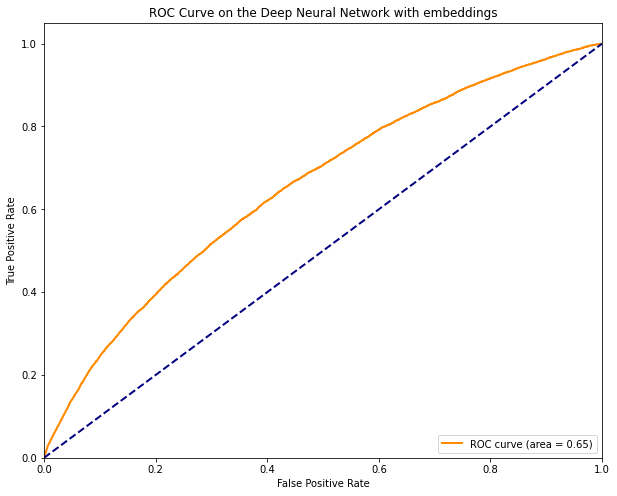

In [69]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)

roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
print('ROC AUC:', roc_auc)

lw = 2
plt.figure(figsize=[10,8])
plt.plot(false_positive_rate, true_positive_rate, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on the Deep Neural Network with embeddings')
plt.legend(loc="lower right")
plt.show()

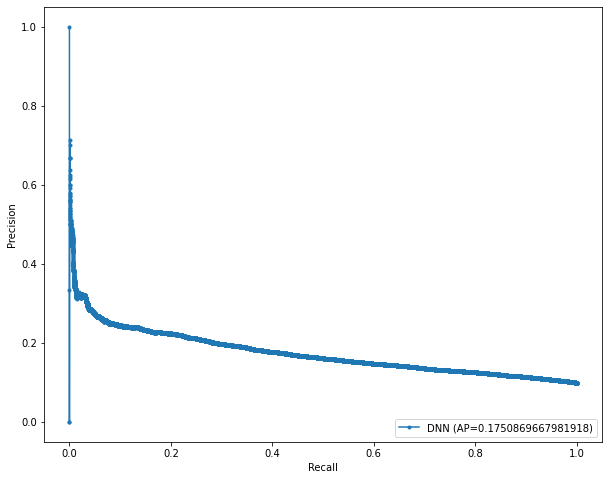

In [70]:
plt.figure(figsize=[10,8])
# calculate model precision-recall curve
ap = metrics.average_precision_score(y_test, y_pred)
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label=f'DNN (AP={ap})')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

Text(0, 0.5, 'Frequency')

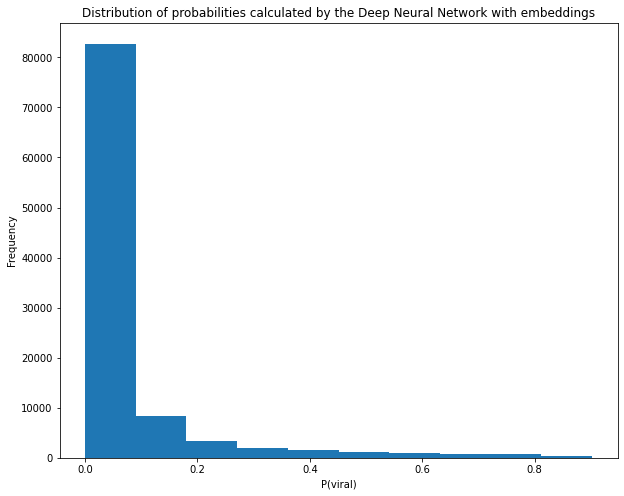

In [71]:
# Displayng the distribution of probabilities calculated by the model
plt.figure(figsize=[10,8])
plt.hist(y_pred)
plt.title("Distribution of probabilities calculated by the Deep Neural Network with embeddings")
plt.xlabel("P(viral)")
plt.ylabel("Frequency")

In [72]:
best_threshold = find_max_F1_threshold(y_pred, y_test)
print_metrics(best_threshold, y_pred, y_test)

For 0.06 threshold, the obtained metrics are:
F1 Score = 0.246235857884141
Precision = 0.17240420885447688
Accuracy = 0.7389934019322912

Confusion matrix:
[[70923 20843]
 [ 5740  4342]]

Normalized confusion matrix:
[[0.77286795 0.22713205]
 [0.56933148 0.43066852]]


As one can see, this is the best performing algorithm out of all the ones tested. Adding word embeddings as an input to the Neural Network significantly improved our ability to predict whether or not the video will reach >100 upvotes. From the business perspective, this is a valuable model for the company. For instance, if the company is able to identify the posts that are likely to get viral, it can focus its efforts on e.g. monitoring those videos to make sure that they do not violate the community guidelines. 